# Ejemplo práctico de una red neuronal construida a mano
---

Autor: Manuel Díaz Bendito

# 0 - Instalaciones necesarias e importación de librerías utilizadas

## Instalación de librerías

In [21]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Imports

In [23]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D, BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy

from keras.datasets import mnist

## Carga y formato de los datos

Number of classes: 10
Example of handwritten digit with correlated noise: 



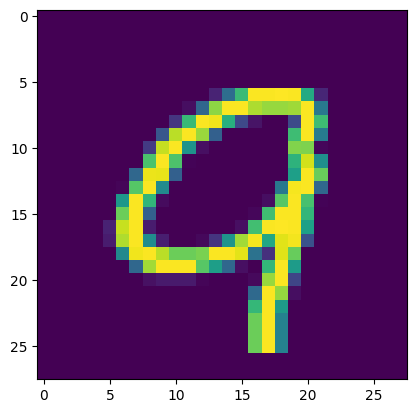

Class: 9

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)


In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_cls = len(np.unique(y_train))
print('Number of classes: ' + str(num_cls))

print('Example of handwritten digit with correlated noise: \n')

k = 3000
plt.imshow(np.squeeze(x_train[k,:,:]))
plt.show()
print('Class: '+str(y_train[k])+'\n')

# RESHAPE and standarize
x_train = np.expand_dims(x_train/255,axis=3)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_cls)

print('Shape of x_train: '+str(x_train.shape))
print('Shape of y_train: '+str(y_train.shape))

## Entrenamiento

In [25]:
model_name='CNN' # To compare models, you can give them different names

pweight='./weights/weights_' + model_name  + '.keras'

if not os.path.exists('./weights'):
  os.mkdir('./weights')

## EXPLORE VALUES AND FIND A GOOD SET
b_size = 4 # batch size
val_split = 0.5 # percentage of samples used for validation
ep = 5 # number of epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,610 (490.66 KB)

 Trainable params: 125,610 (490.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7495/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8878 - loss: 0.3703
Epoch 1: val_loss improved from None to 0.15381, saving model to ./weights/weights_CNN.keras
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9311 - loss: 0.2298 - val_accuracy: 0.9514 - val_loss: 0.1538
Epoch 2/5
7490/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.0988
Epoch 2: val_loss did not improve from 0.15381
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9698 - loss: 0.0984 - val_accuracy: 0.9479 - val_loss: 0.1909
Epoch 3/5
7493/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0525
Epoch 3: val_loss improved from 0.15381 to 0.13281, saving model to ./weights/weights_CNN.keras
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9823 - loss: 0.0591 - val_accuracy: 0.9667 - val_loss: 0.1328
Epoch 4/5
7488/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0346
Epoch 4: val_loss improved from 0.13281 to 0.13105, savi

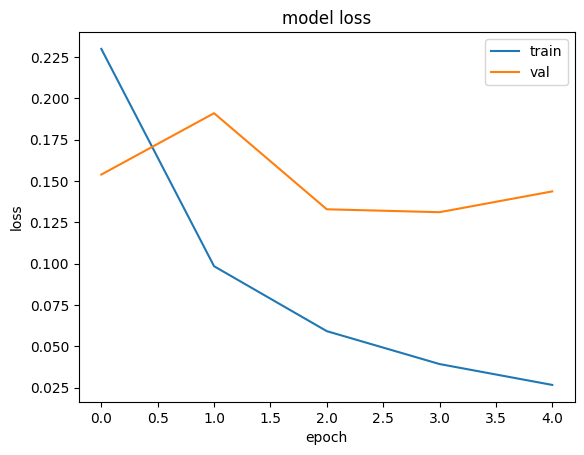

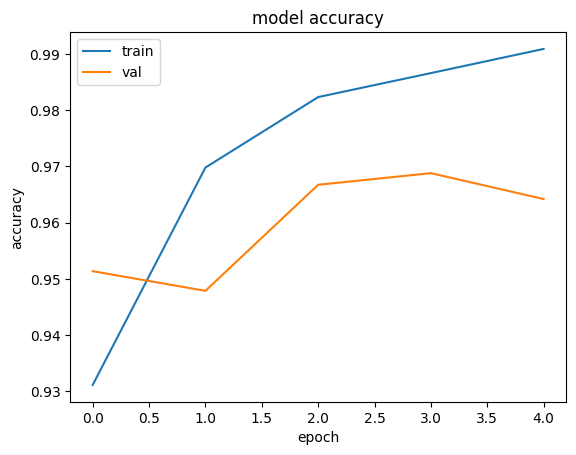

In [26]:
input_shape = x_train.shape[1:4] #(28,28,1)
model = Sequential()

## EXPLORE LAYERS, # CHANNELS... Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D
## SEE KERAS MANUAL https://keras.io/layers/about-keras-layers/
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape)) # explore num channels and adding more layers

model.add(Flatten()) # transforms matrix feature map to vector for dense layer (fully connected)

model.add(Dense(num_cls, activation='softmax')) # This is a necessary output layer, however, you can add more dense layers before with different activation functions

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(learning_rate=0.01, momentum=0.9), # explore other optimizers: Adam, SGD, Adadelta
              metrics=['accuracy'])

model.summary()

checkpointer = ModelCheckpoint(filepath=pweight, verbose=1, save_best_only=True)
callbacks_list = [checkpointer] # explore adding other callbacks such as ReduceLROnPlateau, EarlyStopping

history=model.fit(x_train, y_train,
                    epochs=ep,
                    batch_size=b_size,
                    verbose=1,
                    shuffle=True,
                    validation_split = val_split,
                    callbacks=callbacks_list)

print('CNN weights saved in ' + pweight)

# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Predicciones en el dataset de prueba

In [28]:
from keras.models import load_model

num_cls = len(np.unique(y_test))
print('Number of classes: ' + str(num_cls))

# RESHAPE and standarize
x_test = np.expand_dims(x_test/255,axis=3)

print('Shape of x_test: '+str(x_test.shape)+'\n')

## Define model parameters
model_name='CNN' # To compare models, you can give them different names
pweight='./weights/weights_' + model_name  + '.keras'

model = load_model(pweight)
y_pred_aux = model.predict(x_test)
y_pred=np.argmax(y_pred_aux,axis=1)

Acc_pred = sum(y_pred == y_test)/len(y_test)

print('Accuracy in test set is: '+str(Acc_pred))


Number of classes: 10
Shape of x_test: (10000, 28, 28, 1, 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy in test set is: 0.1028
